**MINI EDA**

In [1]:

# importar las Librerías


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Cargar dataset RAW
df = pd.read_csv("/Users/marymarin/Documents/ML_Mary_Marin/Data/1_raw/CAR DETAILS FROM CAR DEKHO.csv", sep=',')
df




,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


**Visualizar: filas, columnas, valores nulos, tipos de dtos**

In [2]:
df.info()   #Tipos de datos y nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [3]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [4]:
df.shape      # filas, columnas

(4340, 8)

In [5]:
df.describe()      # estadísticas (num y categóricas)

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.nunique()


name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(763)

In [8]:
print(df.isnull().sum()) # Verifico que no hay nulos en ninguna columna

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [9]:
#eliminamos los duplicados

df = df.drop_duplicates()
df.shape


(3577, 8)

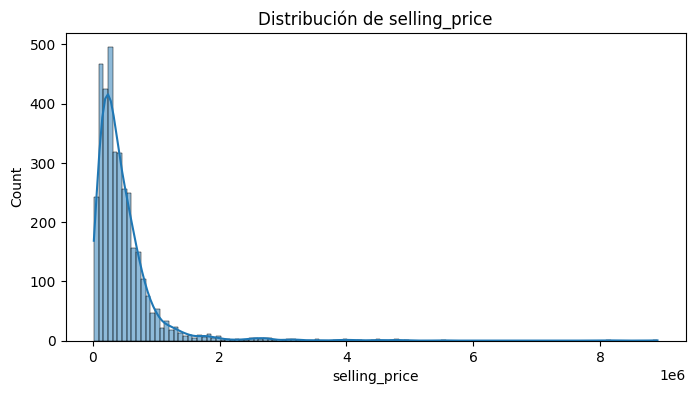

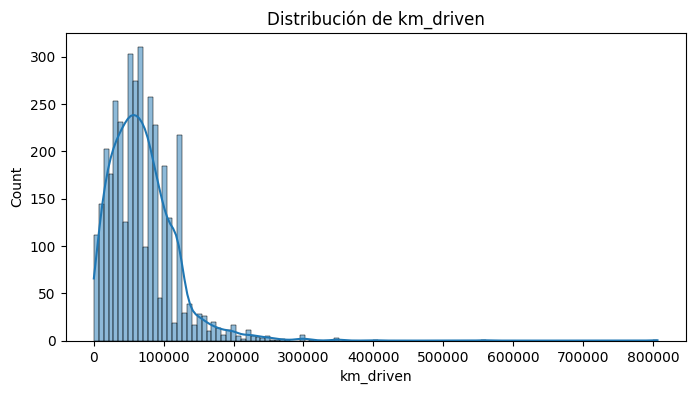

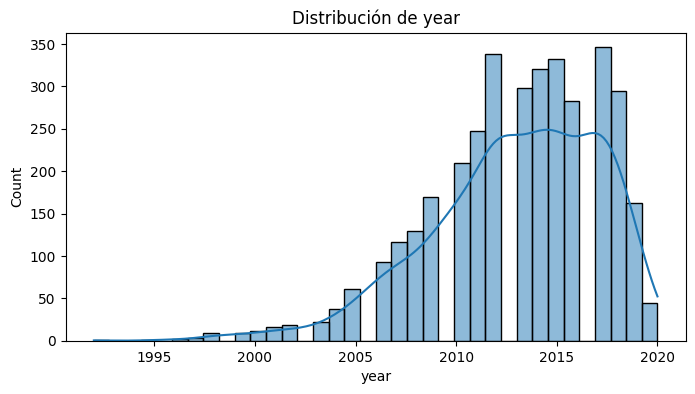

In [10]:
#histogramas numericos

numeric_cols = ["selling_price", "km_driven", "year"]

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()
             #Visualizamos las distribuciones para detectar sesgos, asimetría y posibles outliers.

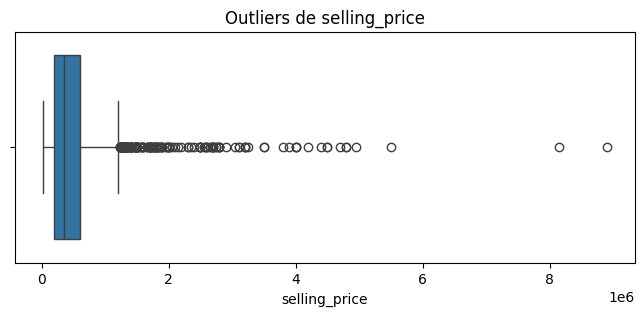

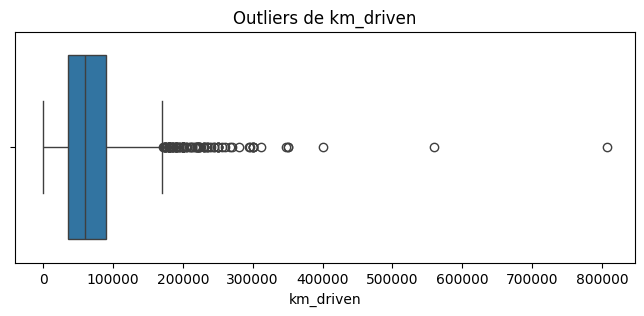

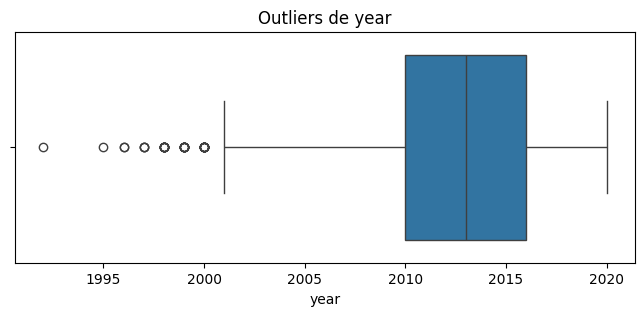

In [11]:


for col in numeric_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers de {col}")
    plt.show()


   #Los boxplots permiten ver valores extremos que podrían distorsionar los modelos.
   

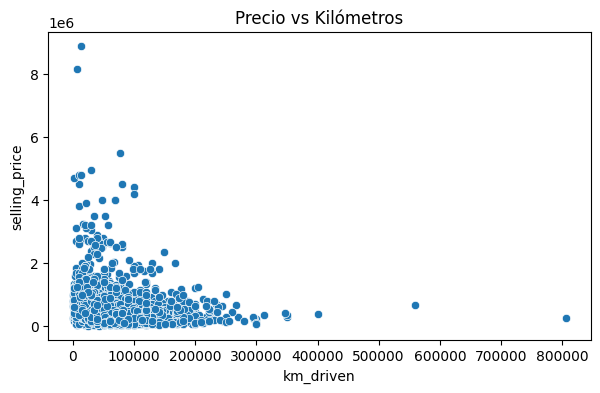

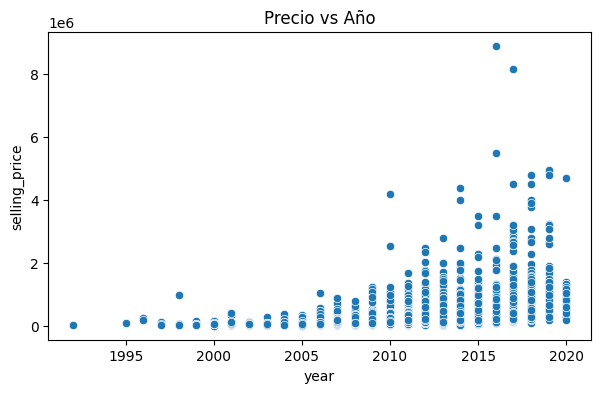

In [12]:
#Relaciones con el precio

plt.figure(figsize=(7,4))
sns.scatterplot(x=df["km_driven"], y=df["selling_price"])
plt.title("Precio vs Kilómetros")
plt.show()

plt.figure(figsize=(7,4))
sns.scatterplot(x=df["year"], y=df["selling_price"])
plt.title("Precio vs Año")
plt.show()


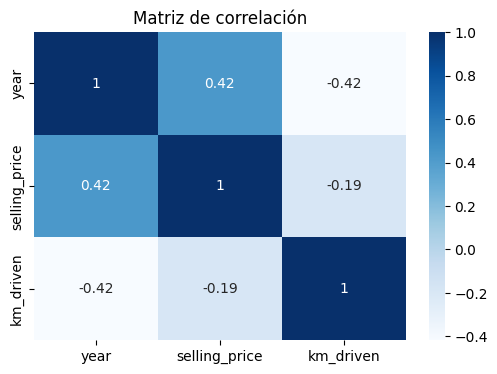

In [13]:

# Matriz de correlación numérica

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Matriz de correlación")
plt.show()



fuel - conteo de valores:


fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

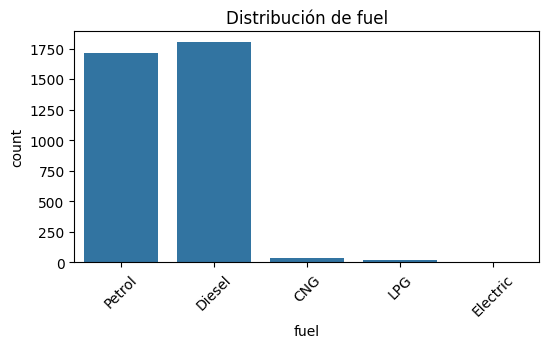


seller_type - conteo de valores:


seller_type
Individual          2832
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

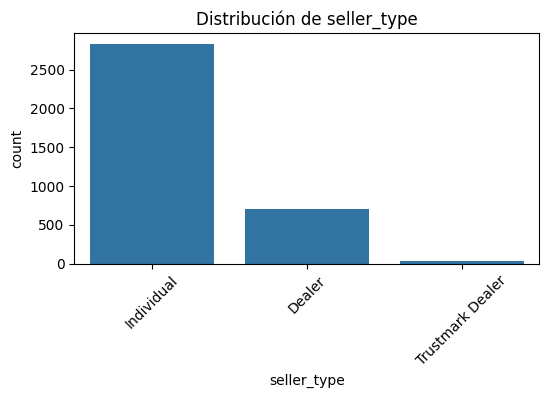


transmission - conteo de valores:


transmission
Manual       3265
Automatic     312
Name: count, dtype: int64

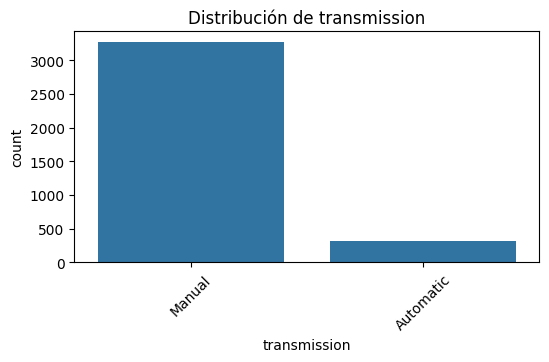


owner - conteo de valores:


owner
First Owner             2218
Second Owner             978
Third Owner              289
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

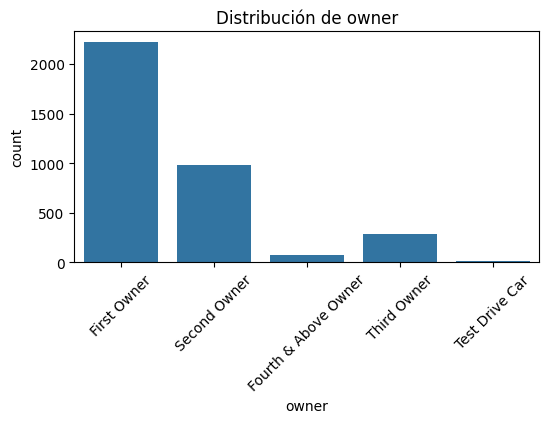

In [14]:

# Análisis de variables categóricas

categorical_cols = ["fuel", "seller_type", "transmission", "owner"]

for col in categorical_cols:
    print(f"\n{col} - conteo de valores:")
    display(df[col].value_counts())

    plt.figure(figsize=(6,3))
    sns.countplot(x=df[col])
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()


In [18]:
!pip install watchdog

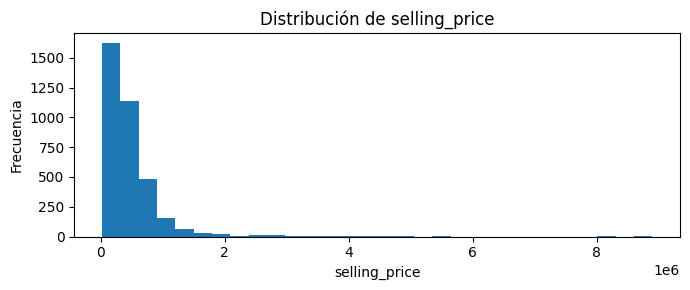

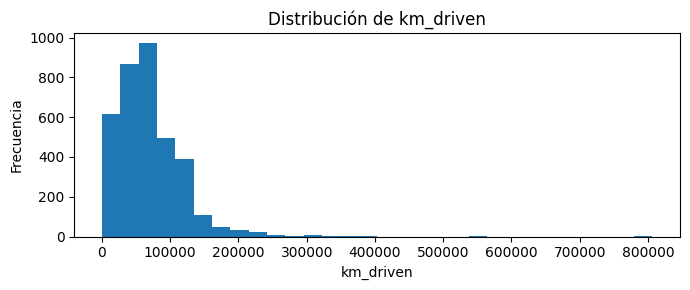

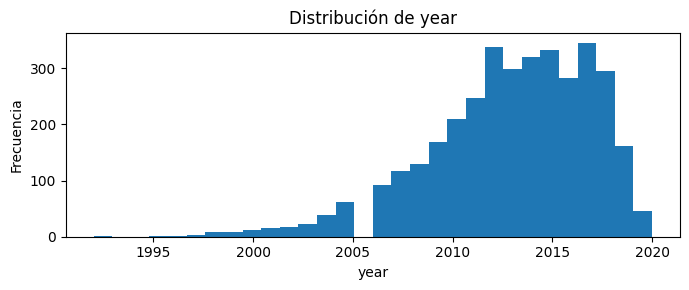

In [15]:
numeric_cols = ['selling_price', 'km_driven', 'year']

for col in numeric_cols:
    plt.figure(figsize=(7,3))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()


In [16]:


# Crear edad del coche
df['age'] = 2025 - df['year']

# Extraer marca
df['brand'] = df['name'].str.split().str[0]

# Crear km_per_year (evitando división por 0)
df['km_per_year'] = df['km_driven'] / df['age'].replace(0,1)

df[['year', 'age', 'brand', 'km_per_year']].head()


/var/folders/gw/2zkhyh4j6wsdhy1hk9gkmgm40000gn/T/ipykernel_58671/3378730162.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = 2025 - df['year']
/var/folders/gw/2zkhyh4j6wsdhy1hk9gkmgm40000gn/T/ipykernel_58671/3378730162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['brand'] = df['name'].str.split().str[0]
/var/folders/gw/2zkhyh4j6wsdhy1hk9gkmgm40000gn/T/ipykernel_58671/3378730162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,year,age,brand,km_per_year
0,2007,18,Maruti,3888.888889
1,2007,18,Maruti,2777.777778
2,2012,13,Hyundai,7692.307692
3,2017,8,Datsun,5750.000000
4,2014,11,Honda,12818.181818


In [17]:
df.to_csv('../Data/2_processed/car_dekho_processed.csv', index=False)
print("Dataset procesado guardado.")
df


Dataset procesado guardado.


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,age,brand,km_per_year
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,18,Maruti,3888.888889
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,18,Maruti,2777.777778
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,13,Hyundai,7692.307692
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,8,Datsun,5750.000000
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,11,Honda,12818.181818
...,...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,11,Hyundai,7272.727273
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,11,Hyundai,7272.727273
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,16,Maruti,5187.500000
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,9,Hyundai,10000.000000



**CONCLUSIONES PRINCIPALES DEL EDA:**

CONCLUSIONES PRINCIPALES DEL EDA

1. El precio (selling_price) está muy sesgado y presenta muchos valores extremos (outliers).
   → Esto es típico en mercados donde existen autos muy baratos y otros de lujo.
   → Es importante porque los modelos lineales son sensibles a valores extremos.
     Por eso evaluamos usar transformaciones (como log) o modelos robustos.

2. La variable km_driven tiene una distribución muy amplia con puntos extremadamente altos.
   → Esto puede representar taxis o errores de registro.
   → Es importante porque el kilometraje influye directamente en el valor del coche
     y los outliers pueden distorsionar los modelos si no se manejan correctamente.

3. La variable year está concentrada en coches relativamente nuevos.
   → Es importante porque el valor real no está en “el año”, sino en la edad del coche.
     Por eso creamos la variable age = 2025 - year, que es mucho más explicativa.

4. Las variables categóricas (fuel, seller_type, transmission, owner) están bien distribuidas.
   → Esto es esencial porque un buen modelo necesita variedad dentro de cada categoría.
     Además, vemos que estas variables influirán en el precio y conviene codificarlas
     correctamente en el siguiente paso (OneHotEncoding).

5. El análisis de correlación muestra que selling_price se relaciona con year y km_driven,
   aunque no de forma extremadamente fuerte.
   → Esto nos indica que el problema no es trivial y necesitará modelos flexibles
     (RandomForest, GradientBoosting, XGBoost), no solo modelos lineales.

6. Las nuevas variables creadas (age, brand, km_per_year) aportan información relevante
   que los modelos no podrían captar directamente.
   → 'age' mejora la explicabilidad del precio.
   → 'brand' captura diferencias importantes en valor de mercado.
   → 'km_per_year' refleja el desgaste real, no solo kilómetros totales.

--------------------
¿POR QUÉ TODO ESTE MINI EDA ES IMPORTANTE?
--------------------

El EDA es un paso fundamental en cualquier proyecto de Machine Learning porque:

✔ Te permite entender cómo se comportan las variables y cómo se relacionan con el objetivo.
✔ Detecta problemas que pueden perjudicar tu modelo (outliers, sesgos, mala escala, nulos).
✔ Ayuda a decidir qué transformaciones y qué Feature Engineering debes aplicar.
✔ Te guía en la selección de los modelos más adecuados para el problema.
✔ Evita entrenar modelos a ciegas, que casi siempre lleva a malos resultados.
✔ Te da contexto para interpretar después los resultados y métricas del modelo.

En resumen:
El EDA no es solo un paso técnico, es el proceso que garantiza que los datos sean fiables,
estables y útiles. Sin un buen EDA, el modelado pierde precisión, interpretabilidad
y valor para el negocio.
""")

